<a href="https://colab.research.google.com/github/KamilShape/workers_regression_project/blob/main/workers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
! git clone https://github.com/KamilShape/data_bases.git

fatal: destination path 'data_bases' already exists and is not an empty directory.


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
workers = pd.read_csv('data_bases/workers.csv')

In [169]:
workers

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
0,1,Martyna,Kalinowska,F,Poland,Administration,Executive,Trainee,March,2003,4800.0
1,2,Iwona,Kalinowska,F,Poland,Administration,Executive,Mid,April,2012,5800.0
2,3,Lidia,Lewandowska,F,Poland,Administration,Secretary,Manager,December,2012,6800.0
3,4,Bożena,Kalinowska,F,Poland,Administration,Executive,Mid,July,2016,5700.0
4,5,Anastazja,Kowalska,F,Poland,Administration,Executive,Mid,June,2013,5800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,F,Norway,Sales,Sales engineer,Senior,July,2007,12600.0
211,212,Ada,Lund,F,Norway,Sales,Sales engineer,Trainee,October,2007,9800.0
212,213,Tobias,Henriksen,M,Norway,Sales,Sales consultant,Senior,November,2005,13400.0
213,214,Johannes,Gundersen,M,Norway,Sales,Sales representative,Junior,November,2015,11400.0


In [170]:
#statistic data
#mean
salary_avg = workers['salary_gross'].mean()
#median
salary_median = workers['salary_gross'].median()
#standard deviation
salary_std = workers['salary_gross'].std()
#minimum and max salary value
salary_min = workers['salary_gross'].min()
salary_max = workers['salary_gross'].max()
print(f'Mean: {salary_avg}')
print(f'Median: {salary_median}')
print(f'Standard deviation: {salary_std}')
print(f'Max: {salary_max}')
print(f'Min: {salary_min}')

Mean: 10841.39534883721
Median: 9800.0
Standard deviation: 4436.436633889897
Max: 24200.0
Min: 4800.0


Histogram

(array([37., 50., 38., 25., 24., 15.,  5., 13.,  4.,  4.]),
 array([ 4800.,  6740.,  8680., 10620., 12560., 14500., 16440., 18380.,
        20320., 22260., 24200.]),
 <BarContainer object of 10 artists>)

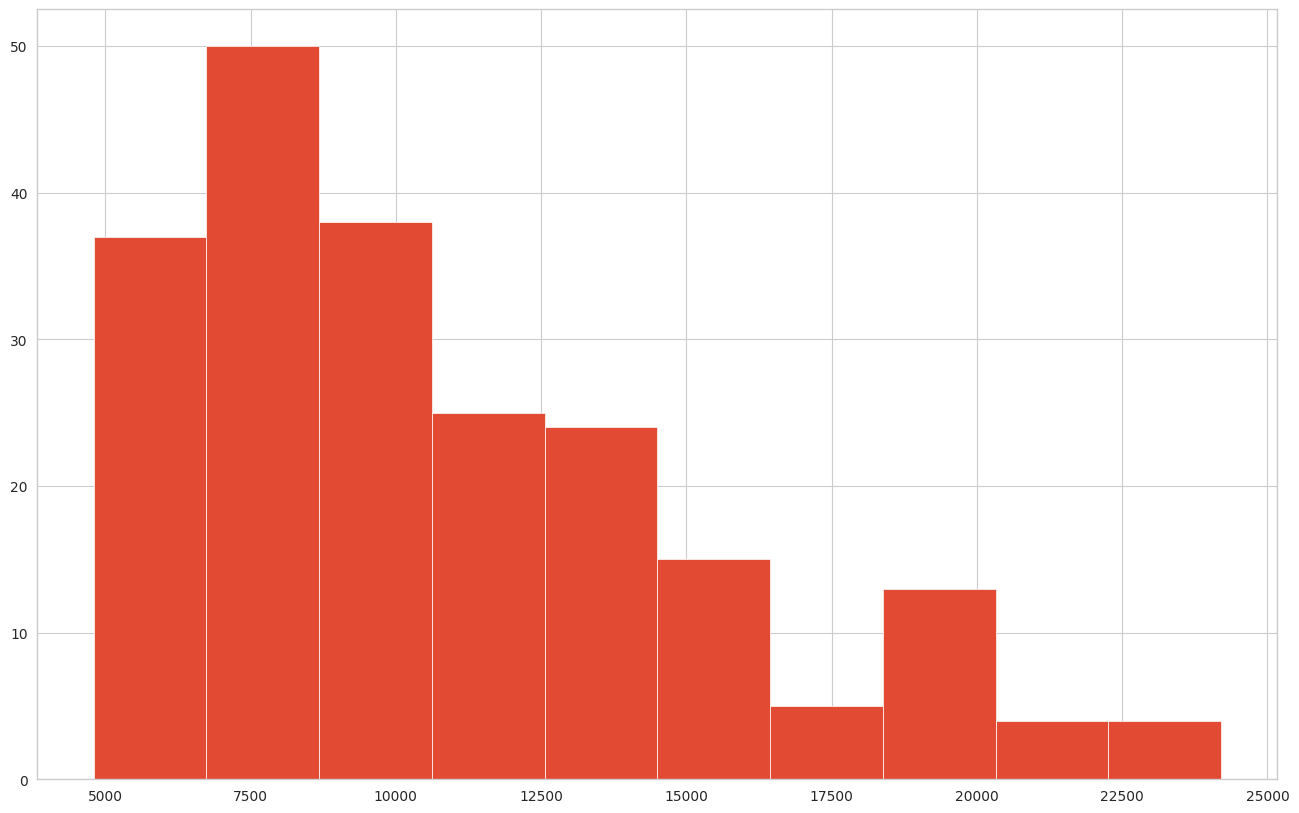

In [171]:
plt.hist(workers['salary_gross'])

In [172]:
from scipy import stats

In [173]:
#shapiro - wilka test
shapiro_test = stats.shapiro(workers['salary_gross'])
shapiro_test.pvalue
#p<0,05 - no bell curve

1.7257721640628887e-10

Changing data types

In [174]:
#changing [year_of_employment] to year
workers['year_of_employment'] = workers['year_of_employment'].apply(lambda x: pd.to_datetime(x, format='%Y').year)

Figures

In [175]:
#functions 
def mean_group_function(group_column, mean_column):
  df = pd.DataFrame(workers.groupby([group_column])[mean_column].mean()).reset_index().sort_values(by=mean_column, ascending=False)
  return df

def draw_bar_figure(data, x, y, size_x, size_y, color, alpha, title, y_label, lim=False, rot=False, **kwargs):
  fig, ax = plt.subplots(figsize=(size_x, size_y))
  ax.bar(data[x], data[y], color = color, alpha = alpha)
  ax.set_title(title)
  # ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  if rot:
     ax.xaxis.set_tick_params(rotation=90)
  if lim:
    ax.set_ylim(kwargs['low_lim'], kwargs['up_lim'])


In [176]:
#set fig style
plt.style.use('ggplot')

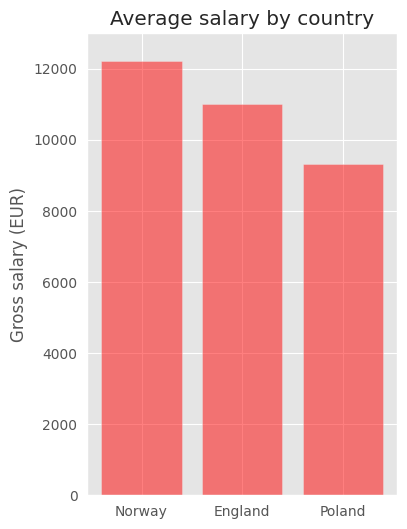

In [177]:
#average salary by country
mean_salary_by_country = mean_group_function('nationality', 'salary_gross')
draw_bar_figure(mean_salary_by_country, 'nationality', 'salary_gross', 4,6, 'r', 0.5, 'Average salary by country','Gross salary (EUR)', lim=True, low_lim = 0, up_lim =13000)

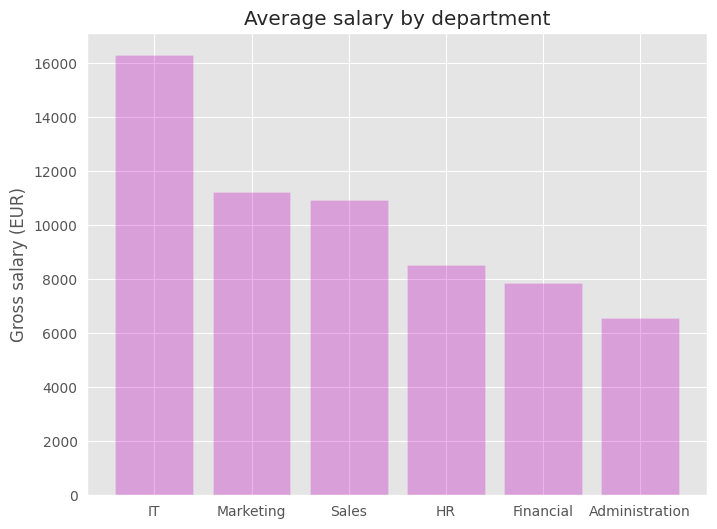

In [178]:
#average salary by department
mean_salary_by_department = mean_group_function('department', 'salary_gross')
draw_bar_figure(mean_salary_by_department, 'department', 'salary_gross', 8,6,'m', 0.3, 'Average salary by department', 'Gross salary (EUR)')

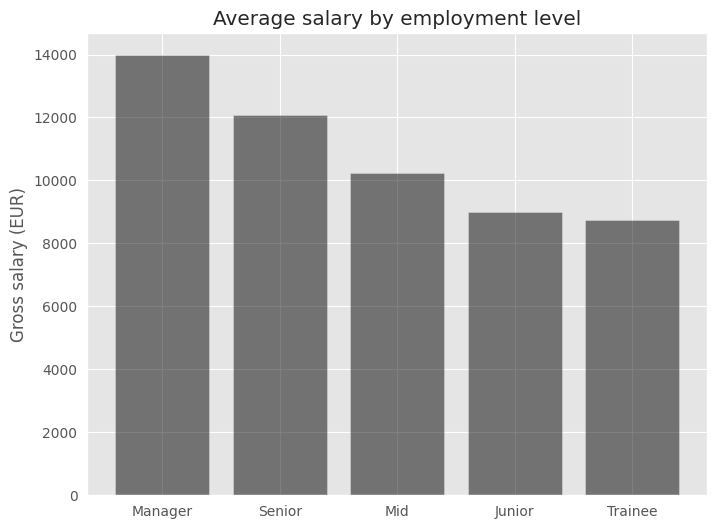

In [179]:
#average salary by employment_level
mean_salary_by_employment_level = mean_group_function('employment_level', 'salary_gross')
draw_bar_figure(mean_salary_by_employment_level, 'employment_level', 'salary_gross', 8,6,'k', 0.5, 'Average salary by employment level', 'Gross salary (EUR)', low_lim = 4000, up_lim =15000)

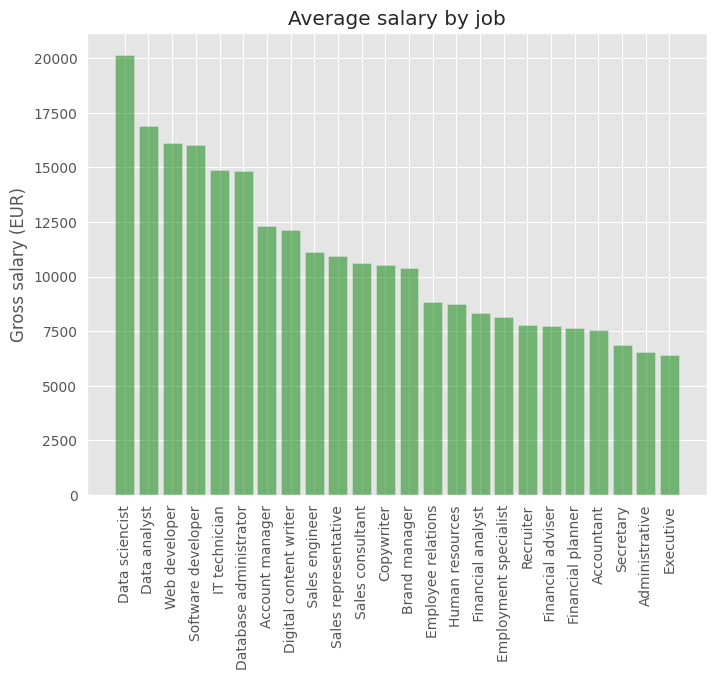

In [180]:
#average salary by job
mean_salary_by_job = mean_group_function('job', 'salary_gross')
draw_bar_figure(mean_salary_by_job, 'job', 'salary_gross', 8,6,'g', 0.5, 'Average salary by job','Gross salary (EUR)', rot=True)

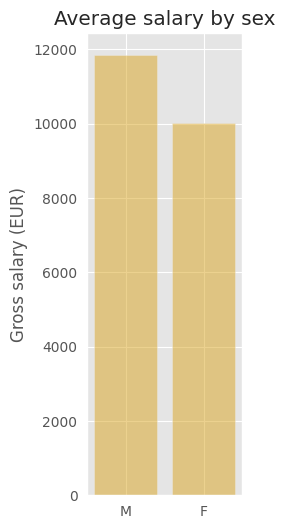

In [181]:
#average salary by sex
mean_salary_by_sex = mean_group_function('sex', 'salary_gross')
draw_bar_figure(mean_salary_by_sex, 'sex', 'salary_gross', 2,6,'goldenrod', 0.5, 'Average salary by sex','Gross salary (EUR)')

Corrected data


In [182]:
#outliners
# upper_value = salary_avg + 3*salary_std
# lower_value = salary_avg - 3*salary_std

upper_quantile = workers['salary_gross'].quantile(0.9)
lower_quantile = workers['salary_gross'].quantile(0.1)
workers2 = workers[(workers['salary_gross'] > lower_quantile) & (workers['salary_gross'] < upper_quantile)]
workers2

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
2,3,Lidia,Lewandowska,F,Poland,Administration,Secretary,Manager,December,2012,6800.0
14,15,Violet,Murray,F,England,Administration,Administrative,Senior,February,2010,7400.0
15,16,Daisy,Rimmer,F,England,Administration,Secretary,Manager,December,2016,7700.0
16,17,Olivia,Murray,F,England,Administration,Administrative,Mid,January,2003,6500.0
17,18,Isabelle,Walsh,F,England,Administration,Administrative,Mid,August,2019,6800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,F,Norway,Sales,Sales engineer,Senior,July,2007,12600.0
211,212,Ada,Lund,F,Norway,Sales,Sales engineer,Trainee,October,2007,9800.0
212,213,Tobias,Henriksen,M,Norway,Sales,Sales consultant,Senior,November,2005,13400.0
213,214,Johannes,Gundersen,M,Norway,Sales,Sales representative,Junior,November,2015,11400.0


Histogram after using quantiles

<ipython-input-183-d90be968e7ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  h_plot = sns.distplot(workers2['salary_gross'])


Text(0.5, 0, 'Gross salary')

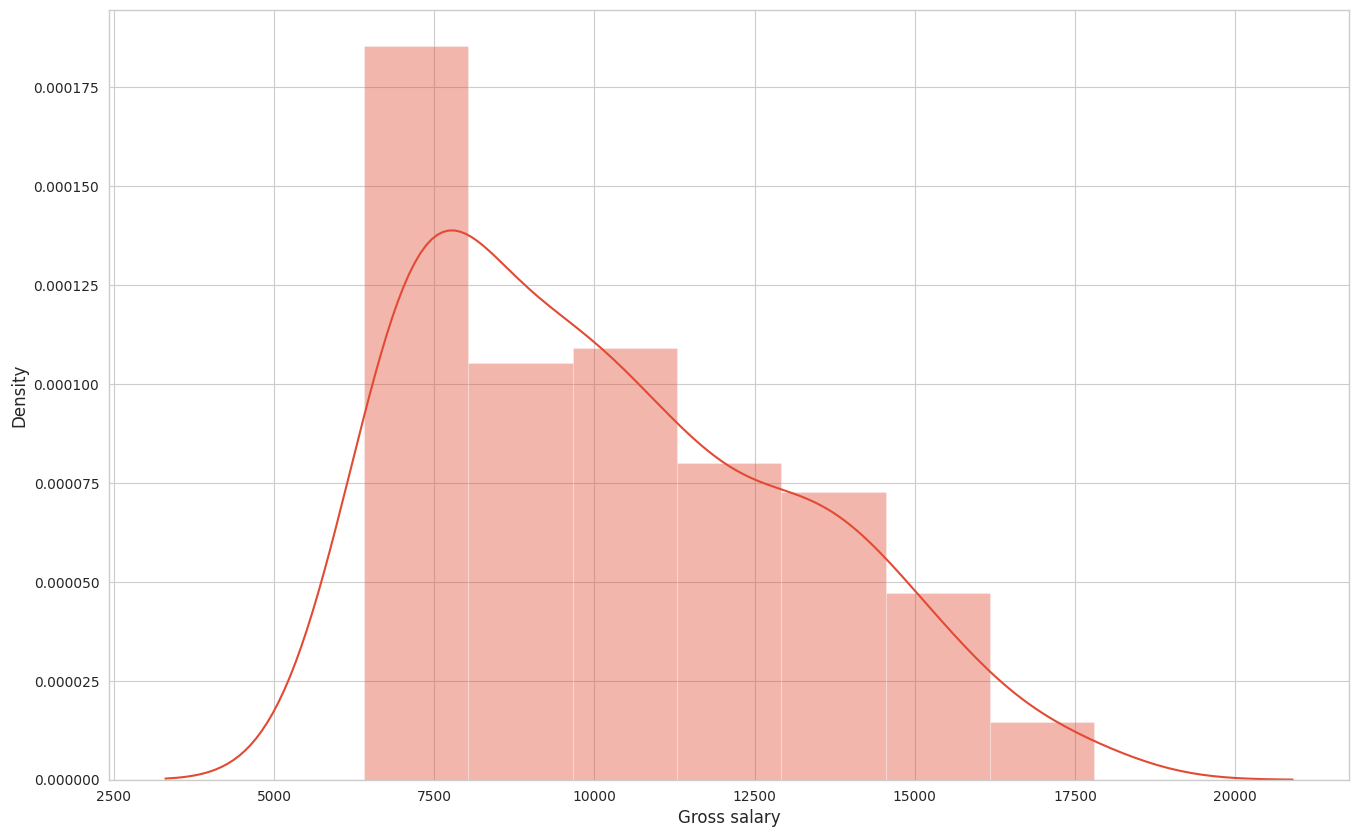

In [183]:
sns.set_style("whitegrid")
h_plot = sns.distplot(workers2['salary_gross'])
plt.rcParams['figure.figsize'] = (16, 10)
h_plot.set_xlabel('Gross salary')

Matching data to prediction models

In [184]:
workers2.iloc[:, 3:10]

,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment
2,F,Poland,Administration,Secretary,Manager,December,2012
14,F,England,Administration,Administrative,Senior,February,2010
15,F,England,Administration,Secretary,Manager,December,2016
16,F,England,Administration,Administrative,Mid,January,2003
17,F,England,Administration,Administrative,Mid,August,2019
...,...,...,...,...,...,...,...
210,F,Norway,Sales,Sales engineer,Senior,July,2007
211,F,Norway,Sales,Sales engineer,Trainee,October,2007
212,M,Norway,Sales,Sales consultant,Senior,November,2005
213,M,Norway,Sales,Sales representative,Junior,November,2015


In [185]:
for col in workers2.iloc[:, 3:10].columns:
  workers2[col] = workers2[col].astype('category')
  workers2[col] = workers2[col].cat.codes

<ipython-input-185-d4bff848bac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers2[col] = workers2[col].astype('category')
<ipython-input-185-d4bff848bac1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers2[col] = workers2[col].cat.codes
<ipython-input-185-d4bff848bac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [186]:
workers2

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
2,3,Lidia,Lewandowska,0,2,0,20,1,2,12,6800.0
14,15,Violet,Murray,0,0,0,5,3,3,10,7400.0
15,16,Daisy,Rimmer,0,0,0,20,1,2,16,7700.0
16,17,Olivia,Murray,0,0,0,5,2,4,3,6500.0
17,18,Isabelle,Walsh,0,0,0,5,2,1,19,6800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,0,1,5,2,3,5,7,12600.0
211,212,Ada,Lund,0,1,5,2,4,10,7,9800.0
212,213,Tobias,Henriksen,1,1,5,18,3,9,5,13400.0
213,214,Johannes,Gundersen,1,1,5,19,0,9,15,11400.0


Correlation matrix

<Axes: >

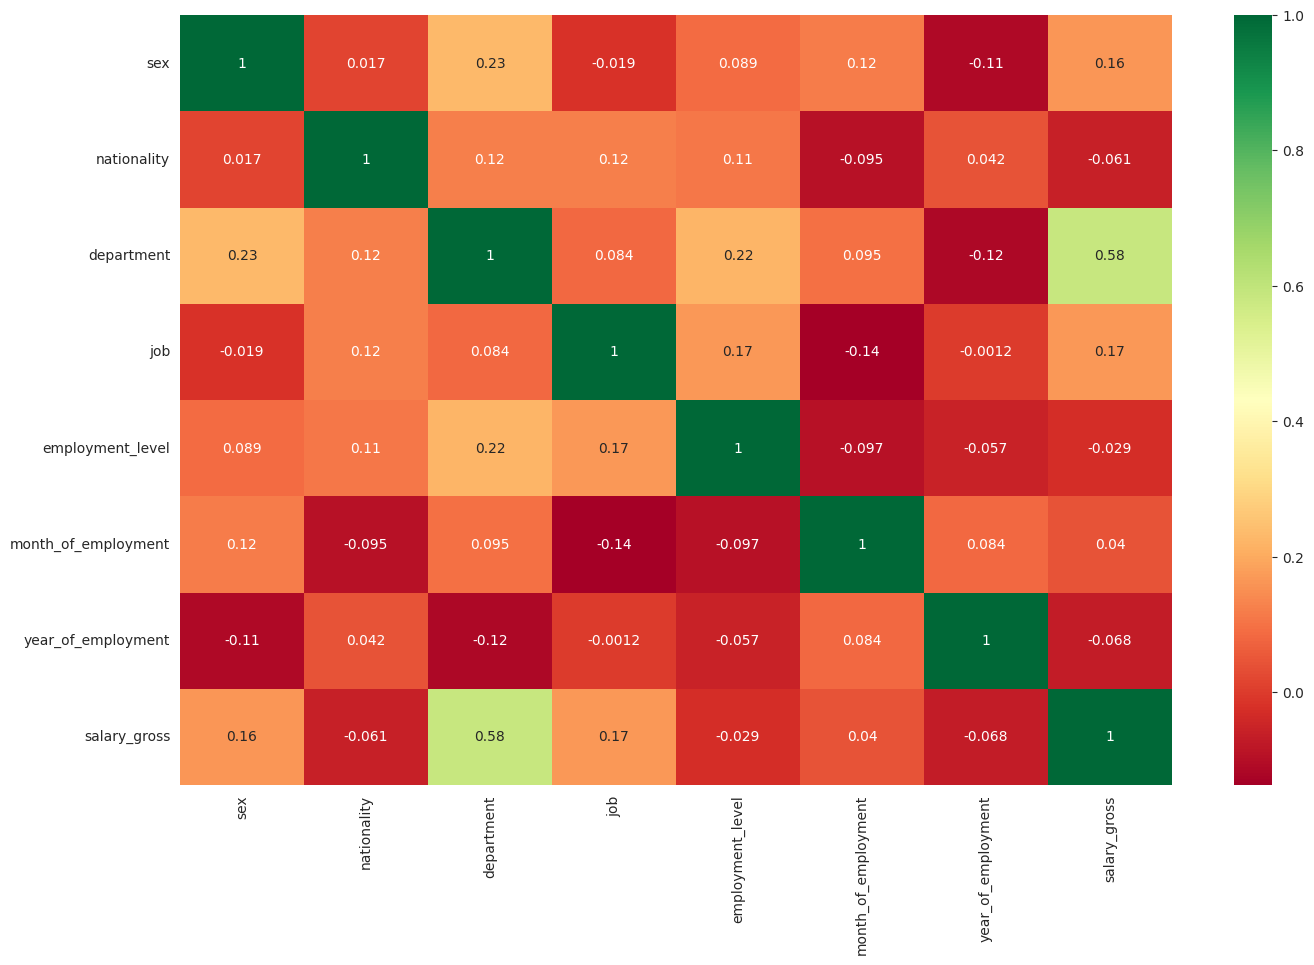

In [187]:
#utworzenie mapy korelacji
workers2_corr = workers2.iloc[:,3:].corr()
sns.heatmap(workers2_corr, cmap='RdYlGn', annot=True)

In [188]:
workers2

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
2,3,Lidia,Lewandowska,0,2,0,20,1,2,12,6800.0
14,15,Violet,Murray,0,0,0,5,3,3,10,7400.0
15,16,Daisy,Rimmer,0,0,0,20,1,2,16,7700.0
16,17,Olivia,Murray,0,0,0,5,2,4,3,6500.0
17,18,Isabelle,Walsh,0,0,0,5,2,1,19,6800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,0,1,5,2,3,5,7,12600.0
211,212,Ada,Lund,0,1,5,2,4,10,7,9800.0
212,213,Tobias,Henriksen,1,1,5,18,3,9,5,13400.0
213,214,Johannes,Gundersen,1,1,5,19,0,9,15,11400.0


In [189]:
workers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 2 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   worker_id            169 non-null    int64  
 1   first_name           169 non-null    object 
 2   last_name            169 non-null    object 
 3   sex                  169 non-null    int8   
 4   nationality          169 non-null    int8   
 5   department           169 non-null    int8   
 6   job                  169 non-null    int8   
 7   employment_level     169 non-null    int8   
 8   month_of_employment  169 non-null    int8   
 9   year_of_employment   169 non-null    int8   
 10  salary_gross         169 non-null    float64
dtypes: float64(1), int64(1), int8(7), object(2)
memory usage: 7.8+ KB


Linear regression model

In [190]:
#depending and independing values
y = workers2.pop('salary_gross')
X = workers2.iloc[:,3:]

In [191]:
#importing frameworks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [193]:
X_train

,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment
200,1,0,5,19,4,5,12
35,0,1,0,20,0,0,13
45,0,2,2,15,1,1,12
28,1,0,0,13,3,10,15
167,1,2,1,1,0,5,6
...,...,...,...,...,...,...,...
32,0,1,0,5,0,0,15
143,1,0,4,6,1,7,5
93,1,0,3,16,0,0,6
172,1,0,1,1,1,11,7


In [194]:
#train data prediction
model=LinearRegression()
model.fit(X_train, y_train)
y_lin_train=model.predict(X_train)

In [195]:
#train model params
model.coef_

array([ 142.51320021, -479.86751567, 1138.27256752,   66.20877515,
       -315.52661843,  -69.56287138,   21.68287323])

In [196]:
model.intercept_

7847.735426119911

In [197]:
#test data prediction
model2=LinearRegression()
model2.fit(X_test, y_test)
y_lin_test=model2.predict(X_test)

In [198]:
#test model params
model2.coef_

array([ 726.60849484, -493.18410489,  762.06581007,   70.78803277,
       -446.33828859,  126.01635901,  -40.54196096])

In [199]:
model2.intercept_

7795.28707787179

In [200]:
#r2 score
from sklearn.metrics import r2_score
r2_score( y_test, y_lin_test)

0.47257255377885954

In [202]:
#r2 score
r2_score(y_train, y_lin_train)

0.42004478786372823

In [203]:
#MSE - train
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_lin_train)

5144040.121435616

In [205]:
#MSE - test
mean_squared_error(y_test, y_lin_test)

2855535.9940444008

In [206]:
#MAPE - test
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_lin_test)

0.12913026002079683

In [207]:
#MAPE - train
mean_absolute_percentage_error(y_train, y_lin_train)

0.16666319910591232